In [167]:
import pandas as pd
import numpy as np

In [168]:
data = pd.read_csv("https://raw.githubusercontent.com/words-sdsc/coursera/master/big-data-4/daily_weather.csv")
data.head()
data.info()
# Here no label data are present all columns are in form of number 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [169]:
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [170]:
# here we are are storing data in format of true or false
clean_data = data.copy()
# this line will return data in format of 0 and 1 
#  (*1) ---> this will work on data which is greater than 24.99 other are marked as 0
clean_data['High_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1     
clean_data['High_humidity_label']

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: High_humidity_label, Length: 1095, dtype: int32

In [171]:
y = clean_data[['High_humidity_label']].copy()
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [172]:
# we are predicting 
other_column = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

# Now store these columns into X

x = clean_data[other_column].copy()
x.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0


In [173]:
print(x.columns)
print(y.columns)
x

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')
Index(['High_humidity_label'], dtype='object')


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0
...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0


In [174]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)
x_train,y_train

(      air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
 324         917.540000     71.384000              219.500000   
 375         918.026453     73.441896              182.932945   
 215         917.240000     45.482000              153.800000   
 1038        920.485609     74.196037               57.176646   
 30          919.350000     91.112000               96.400000   
 ...                ...           ...                     ...   
 919         918.670000     71.996000              177.200000   
 211         918.309541     75.052388              183.267714   
 502         914.950000     39.524000              274.200000   
 537         921.615698     76.029076              173.821185   
 175         915.150000     84.236000              203.600000   
 
       avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
 324             2.169832              202.400000            2.706697   
 375             1.366094              185.856201            2.032277   

In [175]:
from sklearn import tree
# if we are overfitting model then gini index will increase that's why we are creating max node as 10
humidity_classifire = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifire.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [176]:
# Predict on test set
prediction = humidity_classifire.predict(x_test)
prediction[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [177]:
y_test['High_humidity_label'][:10]

1088    1
610     0
270     0
510     0
587     0
699     0
407     1
853     1
326     0
385     1
Name: High_humidity_label, dtype: int32

In [178]:
# accuraccy_score(y_true = y_test , y_pred = predictions)
humidity_classifire.score(x_test,y_test)

0.7629179331306991

[Text(0.5833333333333334, 0.9, 'air_pressure_9am <= 919.175\ngini = 0.5\nsamples = 766\nvalue = [385, 381]'),
 Text(0.36666666666666664, 0.7, 'air_temp_9am <= 72.374\ngini = 0.407\nsamples = 419\nvalue = [119, 300]'),
 Text(0.2, 0.5, 'avg_wind_direction_9am <= 66.95\ngini = 0.241\nsamples = 257\nvalue = [36, 221]'),
 Text(0.13333333333333333, 0.3, 'max_wind_speed_9am <= 5.279\ngini = 0.498\nsamples = 34\nvalue = [18, 16]'),
 Text(0.06666666666666667, 0.1, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.2, 0.1, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.26666666666666666, 0.3, 'gini = 0.148\nsamples = 223\nvalue = [18, 205]'),
 Text(0.5333333333333333, 0.5, 'max_wind_direction_9am <= 146.7\ngini = 0.5\nsamples = 162\nvalue = [83.0, 79.0]'),
 Text(0.4, 0.3, 'avg_wind_direction_9am <= 89.4\ngini = 0.428\nsamples = 71\nvalue = [49, 22]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Text(0.4666666666666667, 0.1, 'gini = 0.249\nsamples

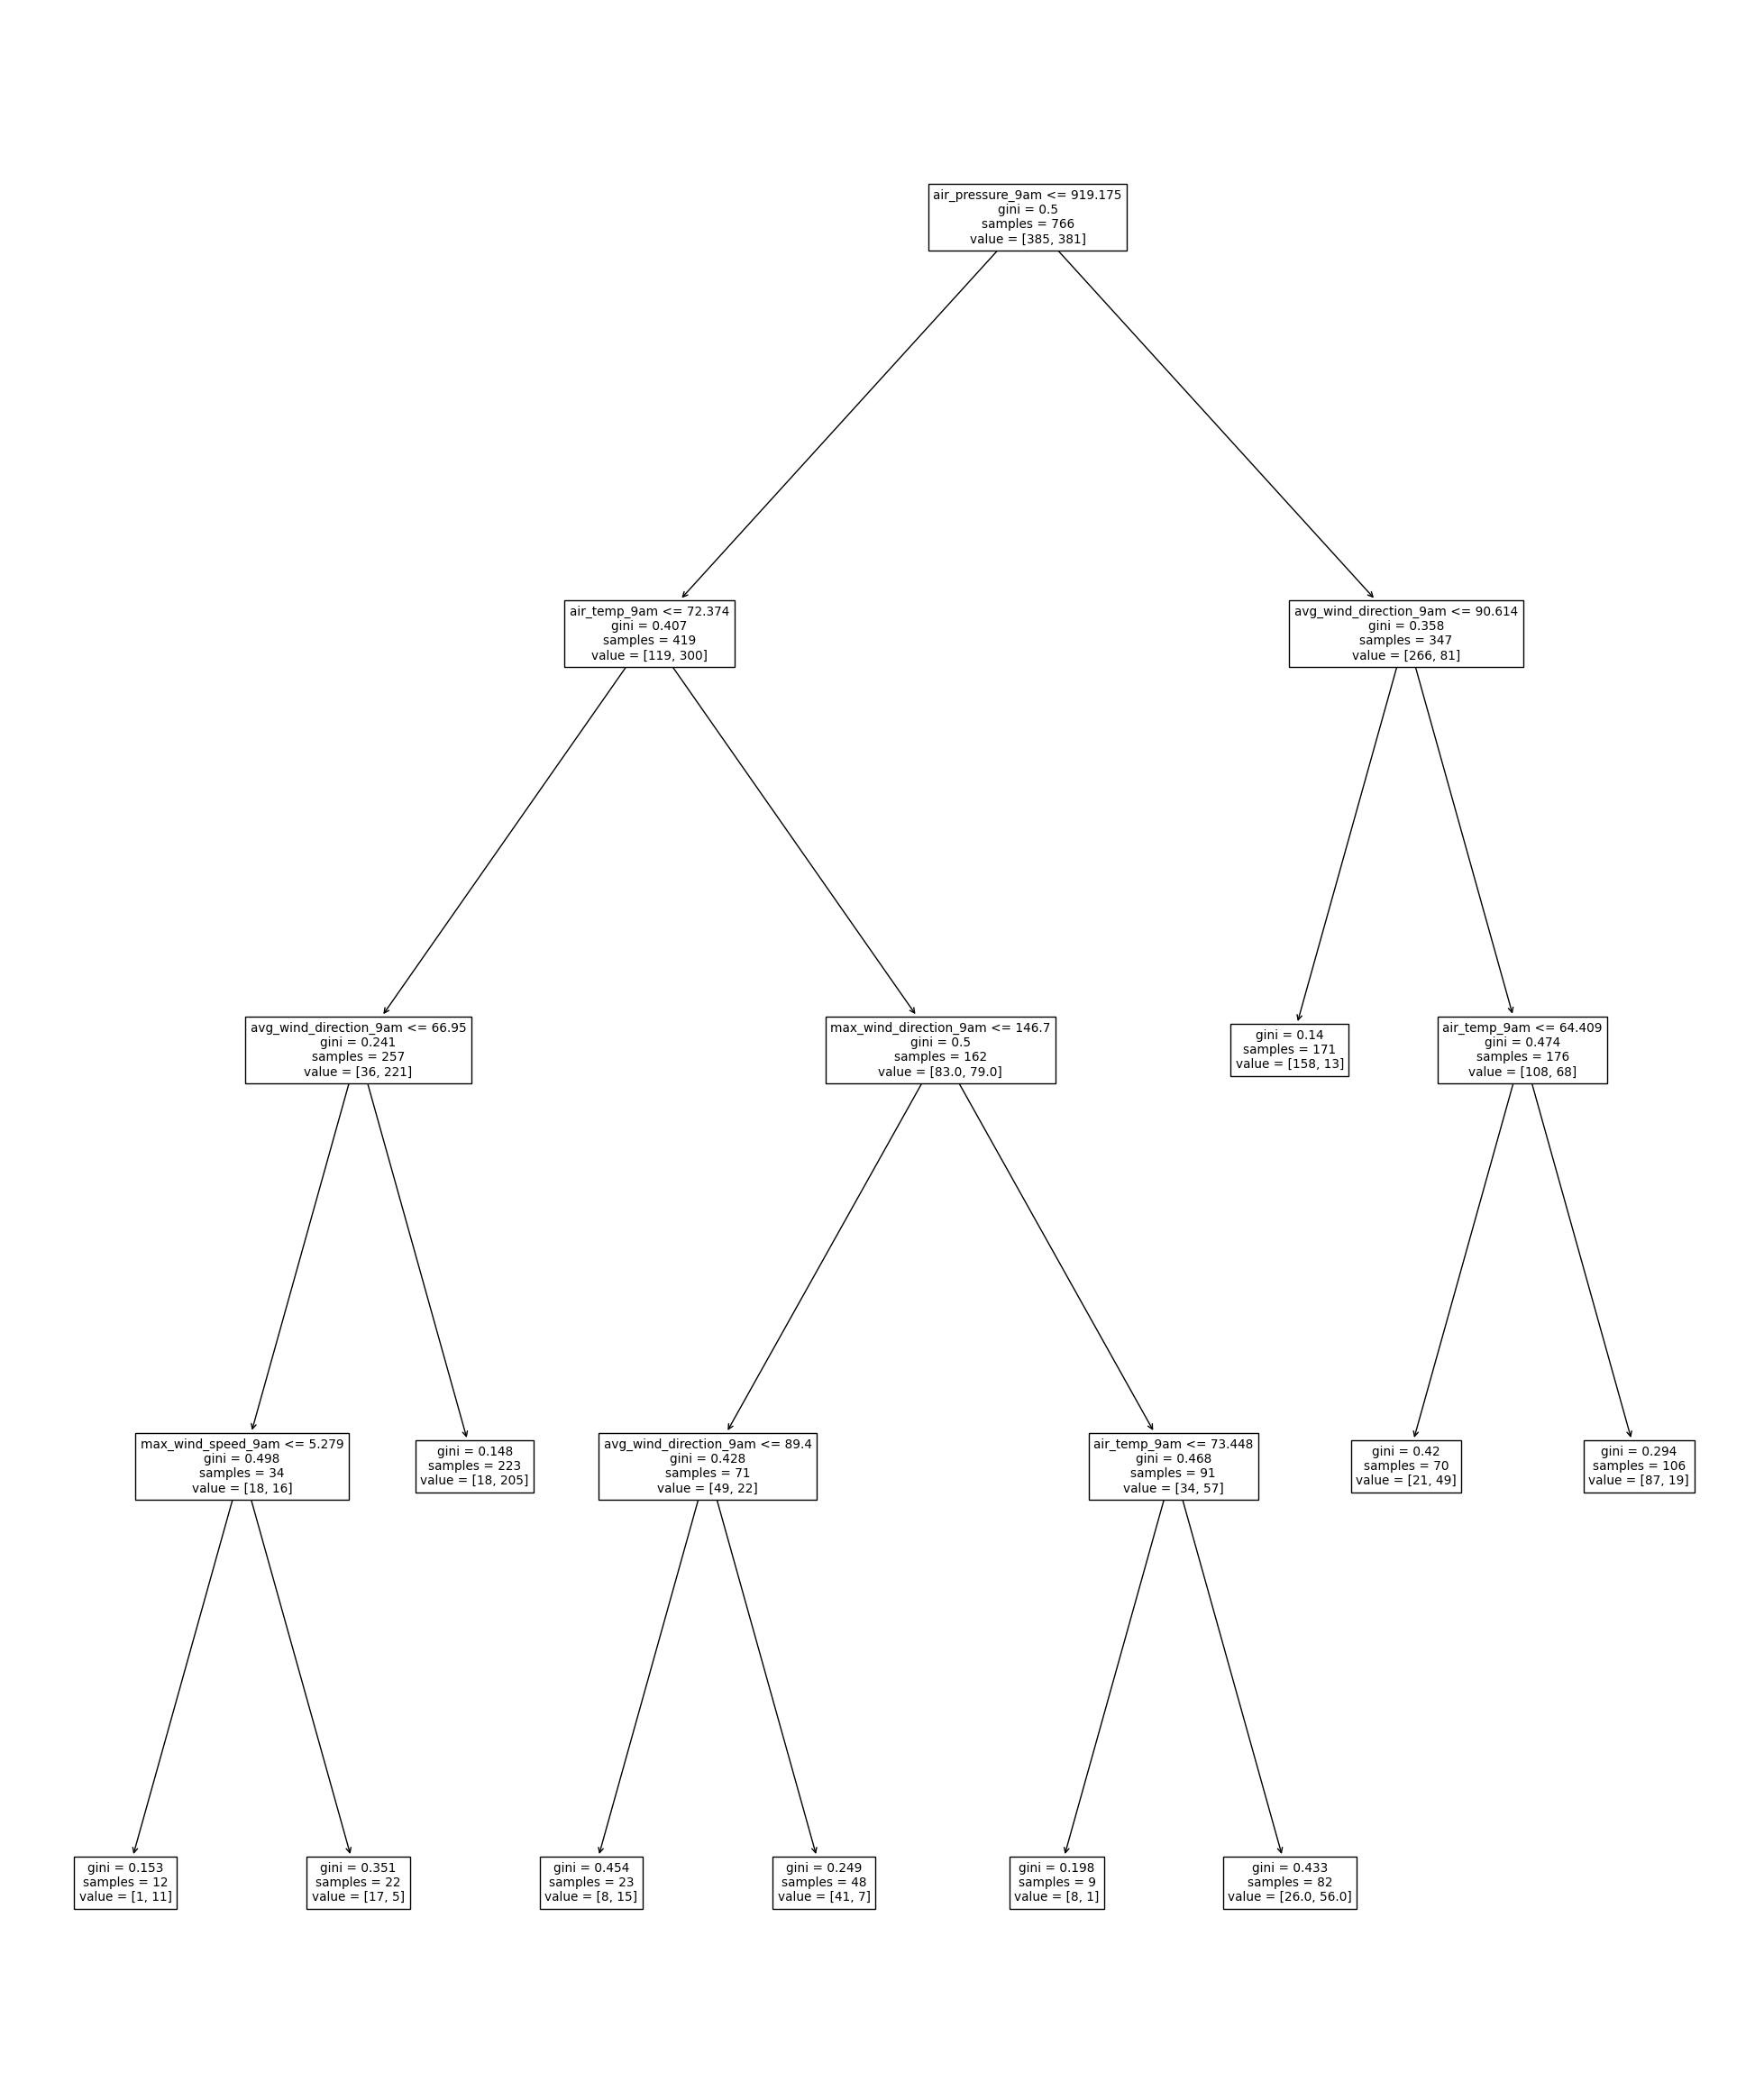

In [179]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,30))
tree.plot_tree(humidity_classifire,feature_names=other_column)

In [180]:
# DataCleaning For Trees 
dataset = pd.read_csv("https://raw.githubusercontent.com/ishitharaj/ML_basics/master/avito.csv")
dataset.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [181]:
dataset.isnull().sum()

item_id                   0
user_id                   0
region                    0
city                      0
parent_category_name      0
category_name             0
param_1                  44
param_2                 447
param_3                 594
title                     0
description              67
price                    65
item_seq_number           0
activation_date           0
user_type                 0
image                    79
image_top_1              79
deal_probability          0
dtype: int64

In [182]:
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               1000 non-null   object 
 1   user_id               1000 non-null   object 
 2   region                1000 non-null   object 
 3   city                  1000 non-null   object 
 4   parent_category_name  1000 non-null   object 
 5   category_name         1000 non-null   object 
 6   param_1               956 non-null    object 
 7   param_2               553 non-null    object 
 8   param_3               406 non-null    object 
 9   title                 1000 non-null   object 
 10  description           933 non-null    object 
 11  price                 935 non-null    float64
 12  item_seq_number       1000 non-null   int64  
 13  activation_date       1000 non-null   object 
 14  user_type             1000 non-null   object 
 15  image                 

In [183]:
expensive_items = dataset[dataset['price']>1000]
expensive_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               480 non-null    object 
 1   user_id               480 non-null    object 
 2   region                480 non-null    object 
 3   city                  480 non-null    object 
 4   parent_category_name  480 non-null    object 
 5   category_name         480 non-null    object 
 6   param_1               456 non-null    object 
 7   param_2               237 non-null    object 
 8   param_3               165 non-null    object 
 9   title                 480 non-null    object 
 10  description           463 non-null    object 
 11  price                 480 non-null    float64
 12  item_seq_number       480 non-null    int64  
 13  activation_date       480 non-null    object 
 14  user_type             480 non-null    object 
 15  image                 440 no

In [184]:
print(expensive_items.shape)  # = (480, 18)
dataset.shape                 # = (1000, 18)

(480, 18)


(1000, 18)

In [185]:
# Removing missing values 
data_with_price = dataset[dataset['price'] != np.nan]
data_with_price.isnull().sum()
# Still it have some null values or empty values

item_id                   0
user_id                   0
region                    0
city                      0
parent_category_name      0
category_name             0
param_1                  44
param_2                 447
param_3                 594
title                     0
description              67
price                    65
item_seq_number           0
activation_date           0
user_type                 0
image                    79
image_top_1              79
deal_probability          0
dtype: int64

In [186]:
dataset['price'].mean(skipna=False)

nan

In [189]:
# Drpoing all values (nan) 
dataset_with_no_null = dataset.dropna(axis=0)
dataset_with_no_null.shape
dataset_with_no_null.price

4       40000.0
7         500.0
8         500.0
9         400.0
10      18000.0
         ...   
984       300.0
989       150.0
992      2300.0
993       650.0
998    550000.0
Name: price, Length: 356, dtype: float64

In [190]:
# Filling na with 0 valuess
dataset['price'].fillna(0)

0          400.0
1         3000.0
2         4000.0
3         2200.0
4        40000.0
         ...    
995          0.0
996        350.0
997    5900000.0
998     550000.0
999       2000.0
Name: price, Length: 1000, dtype: float64

In [192]:
# filling all values with mean
dataset['price'] = dataset['price'].fillna(dataset['price'].mean())
dataset['price']

0      4.000000e+02
1      3.000000e+03
2      4.000000e+03
3      2.200000e+03
4      4.000000e+04
           ...     
995    2.886516e+05
996    3.500000e+02
997    5.900000e+06
998    5.500000e+05
999    2.000000e+03
Name: price, Length: 1000, dtype: float64

In [193]:
# DataCleaning on Time and Dates

arr_ts = [
    0.469112,
    np.nan,
    -5.689738,
    np.nan,
    -8.916232
]
dates = [
    pd.Timestamp('2000-01-31'),
    pd.Timestamp('2000-02-29'),
    pd.Timestamp('2002-07-31'),
    pd.Timestamp('2005-01-31'),
    pd.Timestamp('2008-04-30')
]

ts = pd.Series(arr_ts, index=dates)
ts

2000-01-31    0.469112
2000-02-29         NaN
2002-07-31   -5.689738
2005-01-31         NaN
2008-04-30   -8.916232
dtype: float64

In [195]:
# Replacing nan values with Interpolation method
# Interpolation is method in which mean of previous and next value is assigned to current value
# if xth = nan then xth = mean[(x-1)th + (x+1)th]
ts.interpolate()

2000-01-31    0.469112
2000-02-29   -2.610313
2002-07-31   -5.689738
2005-01-31   -7.302985
2008-04-30   -8.916232
dtype: float64

In [197]:
# this method is use ploting graph and straight line on that graph decides the value of nan
ts.interpolate(method='time')

2000-01-31    0.469112
2000-02-29    0.273271
2002-07-31   -5.689738
2005-01-31   -7.095568
2008-04-30   -8.916232
dtype: float64